<a href="https://colab.research.google.com/github/tunabozkir/NLP-hotel-reviews-sentiment-analysis/blob/main/reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# First, import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")

In [2]:
# Read the dataset and look at the first five records
df = pd.read_csv("hotel-reviews.csv")
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [3]:
# Drop the unnecessary columns for sentiment analysis
df.drop(["User_ID","Browser_Used","Device_Used"],axis=1,inplace=True)

In [4]:
df.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [5]:
# Good to see there is no NAN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  38932 non-null  object
 1   Is_Response  38932 non-null  object
dtypes: object(2)
memory usage: 608.4+ KB


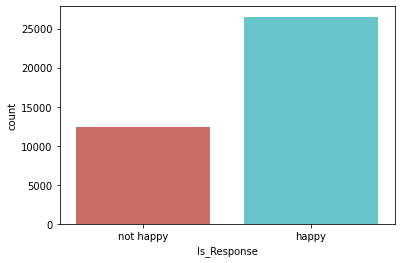

In [6]:
# Check my Target feature
sns.countplot(df["Is_Response"],palette="hls");

In [7]:
# Apply One Hot Encoding to my Target feature
df["Is_Response"] = pd.get_dummies(df["Is_Response"])
df.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,0
1,I stayed at the Crown Plaza April -- - April -...,0
2,I booked this hotel through Hotwire at the low...,0
3,Stayed here with husband and sons on the way t...,1
4,My girlfriends and I stayed here to celebrate ...,0


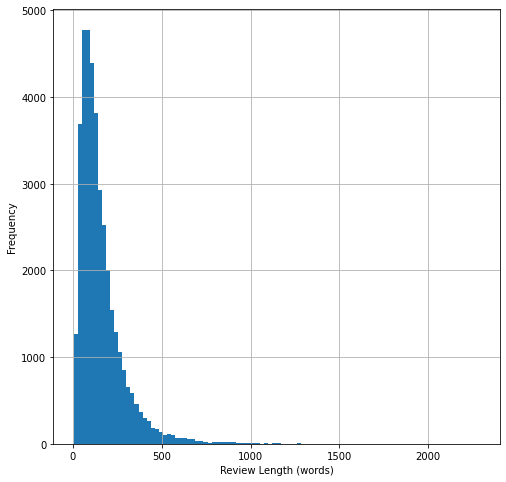

In [8]:
# Get the number of words by splitting them by a space
plt.figure(figsize=(8,8))
words_per_review = df["Description"].apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel("Review Length (words)")
plt.ylabel("Frequency")
plt.show();

In [9]:
print(" Average words: ",words_per_review.mean())

 Average words:  156.2512842905579


In [10]:
words_per_review.sum()

6083175

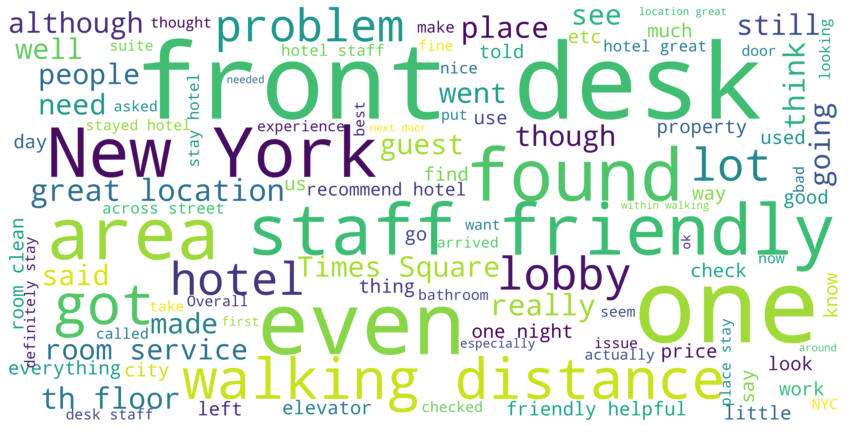

In [11]:
# Make a WordCloud of the my String values and appreciate the text distribution
from wordcloud import WordCloud
word_cloud_text = " ".join(df["Description"])
wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scale between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, 
           interpolation="bilinear") # Make the displayed image appear more smoothly
plt.axis("off")
plt.show();

In [12]:
# Clean the text

import re
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
new_list = []
for i in range(len(df["Description"])):
  review = re.sub("[^a-zA-Z]"," ",df["Description"][i])  # Get rid of whole punctuation and meaningless numbers from the text
  review = review.lower() # Make the lower case for my text
  review = review.split()
  lemma = WordNetLemmatizer()
  all_stopwords = stopwords.words("english")
  all_stopwords.remove("not") # Get whole stopwords except not, because it completely changes the meaning of the text
  review = [lemma.lemmatize(word) for word in review if not word in set(all_stopwords)]
  review = " ".join(review)
  new_list.append(review)

    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
# Apply TFIDF Vectorizer for my independent feature
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 5000)
X = tfidf.fit_transform(new_list).toarray()
y = df["Is_Response"]

In [14]:
# Split the dataset into Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234,stratify=y)

#### Apply 4 different ML algorithms for my dataset.
1. Multinomial Naive Bayes
2. Logistic Regression
3. Random Forest Classifier
4. Passive Aggressive Classifier

In [15]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb.score(X_test,y_test)

0.8629405116613582

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=1234)
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.8892427822870647

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.8509195520394534

In [18]:
from sklearn.linear_model import PassiveAggressiveClassifier
passive = PassiveAggressiveClassifier(random_state=1234)
passive.fit(X_train,y_train)
passive.score(X_test,y_test)

0.8567759169834583

#### As a result, Logistic Regression model predicts well. So, nice to go with that model. 

In [19]:
# Example of a positive review
new_review = "It was a great experience."
new_review = re.sub("[^a-zA-Z]", " ", new_review)
new_review = new_review.lower()
new_review = new_review.split()
from nltk.stem import WordNetLemmatizer
all_stopwords = stopwords.words("english")
all_stopwords.remove("not")
new_review = [lemma.lemmatize(word) for word in new_review if not word in set(all_stopwords)]
new_review = " ".join(new_review)
new_corpus = [new_review]
new_X_test = tfidf.transform(new_corpus).toarray()
new_y_pred = log_reg.predict(new_X_test)
print(new_y_pred)


[1]


In [20]:
# Example of a negative review
new_review = "It was a terrible experience."
new_review = re.sub("[^a-zA-Z]", " ", new_review)
new_review = new_review.lower()
new_review = new_review.split()
from nltk.stem import WordNetLemmatizer
all_stopwords = stopwords.words("english")
all_stopwords.remove("not")
new_review = [lemma.lemmatize(word) for word in new_review if not word in set(all_stopwords)]
new_review = " ".join(new_review)
new_corpus = [new_review]
new_X_test = tfidf.transform(new_corpus).toarray()
new_y_pred = log_reg.predict(new_X_test)
print(new_y_pred)


[0]
